### Averaging KNN, Decision Tree, Random Forest

In [3]:

import numpy as np
import numpy.random as npr

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

%precision %.2f

'%.2f'

In [4]:
# Get the dataset X, Yy
import sklearn.datasets

# load the newsgroups data
train = sklearn.datasets.fetch_20newsgroups_vectorized(subset='train')
X_train = train.data
y_train = train.target

test = sklearn.datasets.fetch_20newsgroups_vectorized(subset='test')
X_test = test.data
y_test = test.target

In [5]:
print("n =", X_train.shape[0])
print("d =", X_train.shape[1])
print("t =", X_test.shape[0])
num_classes = len(np.unique(y_train))
print("number of classes =", num_classes)

n = 11314
d = 130107
t = 7532
number of classes = 20


In [6]:
#method to print training error and test error for a model
def print_errs(model):
    train_err = 1-model.score(X_train, y_train)
    test_err  = 1-model.score(X_test,  y_test)

    print("Train error:", train_err)
    print("Test  error:", test_err)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


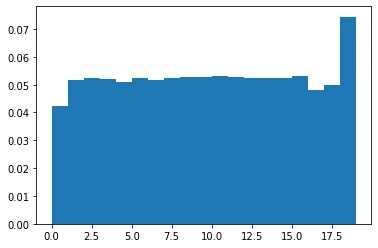

In [7]:
# check the uniformity of the training labels
plt.hist(y_train, normed=True, bins=np.unique(y_train));

### Ensemble decision tree, KNN, and random forest

In [8]:
#Descison Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print_errs(dt)

Train error: 8.838607035532853e-05
Test  error: 0.44144981412639406


In [9]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print_errs(rf)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train error: 0.0017677214071062375
Test  error: 0.43773234200743494


In [10]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print_errs(knn)

Train error: 0.20867951210889168
Test  error: 0.5916091343600638


In [11]:
#Ensemble three classifier
from sklearn.ensemble import VotingClassifier

classifiers = {
    "decision tree" : dt,
    "random forest" : rf,
    "KNN"           : knn
}

ensemble = VotingClassifier(classifiers.items())
ensemble.fit(X_train, y_train)

print_errs(ensemble)

Train error: 0.0008838607035531743
Test  error: 0.4114445034519384


### XGBoost

In [12]:
import xgboost as xgb
import scipy.sparse

dtrain = xgb.DMatrix(scipy.sparse.csc_matrix(X_train), label=y_train)
dtest =  xgb.DMatrix(scipy.sparse.csc_matrix(X_test),  label=y_test)

In [13]:

param = {'max_depth':10, 'eta':1, 'silent':1, 'objective':'multi:softmax', 'num_class':num_classes}
num_round = 10 # number of trees

bst = xgb.train(param, dtrain, num_round)

In [14]:

yhat_train = bst.predict(dtrain)
yhat_test  = bst.predict(dtest)

print("Train error:", np.mean(yhat_train != y_train))
print("Test error:",  np.mean(yhat_test != y_test))

Train error: 0.00035354428142124803
Test error: 0.32833244822092406
